TEAM MEMBERS:

# <span style="color:red">Geo-Sentiment Mapping of Public Events</span>

This project focuses on analyzing **tweets** and **news headlines** to visualize **sentiment** and **emotion trends** across different regions using geospatial data. The objective is to perform:

- **Exploratory Data Analysis (EDA)** to quickly understand the dataset structure, distributions, and check for missing or inconsistent values.

- Generating <b>interactive visualizations</b> to explore sentiment and emotion patterns across regions, time, and content sources like <b>Twitter</b> and <b>News</b>.


---
### <span style="color:green">Incorporating Machine Learning</span>

In addition to visual analysis, this project applies **supervised machine learning techniques** to:

- Train predictive models that automatically classify sentiment and emotion based on event features such as <b>text content</b>, <b>location</b>, <b>time</b>, and <b>geospatial coordinates</b>.
- Evaluate model performance using metrics like <b>Accuracy</b>, <b>F1-Score</b>, and <b>Confusion Matrices</b>.
- Build **feature-based** models (using encoded columns).

---

### <span style="color:blue">End Goal</span>

By combining <b>data visualization</b> and <b>machine learning</b>, this project aims to provide insights into how sentiment and emotions surrounding global events evolve over time and space, offering valuable information for researchers, policymakers, and organizations.



<span style="color:black"><b>Dataset Source</b>: Kaggle</span>


---

## <span style="color:blue">Dataset Overview</span>

The dataset used in this project contains information related to online content such as tweets and news articles, enriched with sentiment analysis and location-based details. It includes various attributes such as:

- <span style="color:orange">**Text and Sentiment Information**</span>: The raw text content, sentiment labels (e.g., Positive, Negative,Neutral), and sentiment scores generated using tools like VADER.  
- <span style="color:orange">**Location and Time Details**</span>: Latitude, longitude, and location columns indicating the geographical source of the content, along with date and time components extracted from timestamps.  
- <span style="color:orange">**Source and Emotions**</span>: Information about the source of the content (e.g., Twitter or News) and detected emotions such as Anger, Anticipation, Disgust, etc.  

This dataset provides a comprehensive view of textual data combined with location, sentiment, and emotional context, allowing for deeper analysis of how different emotions and sentiments are distributed across sources and locations.  
The dataset can be used for tasks like sentiment trend analysis, emotion detection, geospatial insights, and preparing data for machine learning models.



### <span style="color:blue">Library Imports and Purpose</span>

In this section, we are importing the essential Python libraries required for <b>data analysis</b>, <b>preprocessing</b>, <b>visualization</b>, and <b>machine learning</b>:

- <span style="color:orange">**pandas**</span>: Used for reading, manipulating, and analyzing <b>structured data</b> (tabular format).
- <span style="color:orange">**sklearn.preprocessing.LabelEncoder**</span>: Helps convert <b>categorical variables</b> (text labels) into <b>numeric form</b>, which is essential for applying <b>machine learning models</b>.
- <span style="color:orange">**numpy**</span>: Provides support for <b>numerical operations</b> and handling arrays, useful for computations and <b>data manipulation</b>.
- <span style="color:orange">**matplotlib.pyplot**</span>: A popular plotting library to create basic visualizations like <b>bar charts</b>, <b>line plots</b>, etc.
- <span style="color:orange">**seaborn**</span>: Built on top of Matplotlib, it provides enhanced, attractive, and easier-to-create visualizations, especially for <b>statistical graphics</b> like <b>heatmaps</b> or <b>correlation plots</b>.
- <span style="color:orange">**plotly.express (px)**</span>: A high-level library for creating interactive visualizations like <b>scatter plots</b>, <b>geo maps</b>, and <b>bar charts</b> with built-in hover features and zooming capabilities.
- <span style="color:orange">**folium**</span>: A Python library for creating interactive <b>leaflet maps</b> that can be easily embedded into notebooks and web apps.  
- <span style="color:orange">**folium.plugins.MarkerCluster**</span>: Adds a <b>marker clustering</b> feature to the map, automatically grouping nearby data points for a cleaner and more readable visualization.
- <span style="color:orange">**wordcloud**</span>: A library used to generate <b>word clouds</b>, which are visual representations of text data where the size of each word reflects its frequency or importance. It's useful for quickly understanding the most common words in headlines, tweets, or any textual content.




#### Additional Libraries for Machine Learning:

- <span style="color:orange">**sklearn.model_selection.train_test_split**</span>: Splits the dataset into <b>training</b> and <b>testing</b> subsets to evaluate model performance effectively.
- <span style="color:orange">**sklearn.ensemble.RandomForestClassifier**</span>: A powerful ensemble-based machine learning algorithm that builds multiple decision trees and combines their results for more accurate classification.
- <span style="color:orange">**sklearn.metrics**</span>: Provides essential functions like <b>classification_report</b>, <b>confusion_matrix</b>, and <b>accuracy_score</b> to evaluate and interpret model performance.

These libraries enable us to not only explore and visualize the data but also build, train, and assess predictive models.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## <span style="color:blue">Data Inspection & Understanding</span>

### <span style="color:blue"> Reading the file

In [2]:
df = pd.read_csv("GeoSentiment_dataset.csv")
print("Dataset read successfully.")

Dataset read successfully.


#### <span style="color:green"> Reading the top 5 values
To understand the data

In [3]:
df.head()

,id,text,sentiment,location,latitude,longitude,source,timestamp,polarity,vader_sentiment_label,vader_compound,Emotions
0,1,Severe pollution alert issued in New York,Negative,"New York, USA",40.7128,-74.0060,News,03-03-2025 04:08,0.136364,negative,-0.1027,disgust
1,2,Floods disrupt life in Beijing suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,05-02-2025 10:56,0.000000,neutral,0.0000,anger
2,3,Floods disrupt life in Cairo suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,15-02-2025 14:45,0.000000,neutral,0.0000,anger
3,4,Grand parade held in Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,02-02-2025 08:46,0.125000,positive,0.4588,anticipation
4,5,Power outage reported in London,Neutral,"London, UK",51.5074,-0.1278,Twitter,23-02-2025 12:41,0.000000,neutral,0.0000,anger


#### <span style="color:green"> Reading the bottom 5 values
To understand the data

In [4]:
df.tail()

,id,text,sentiment,location,latitude,longitude,source,timestamp,polarity,vader_sentiment_label,vader_compound,Emotions
9995,9996,Grand parade held in Sydney,Positive,"Sydney, Australia",-33.8688,151.2093,Twitter,17-02-2025 15:27,0.125000,positive,0.4588,anticipation
9996,9997,New York celebrates national holiday with joy!,Positive,"New York, USA",40.7128,-74.0060,News,15-02-2025 01:03,0.568182,positive,0.8883,joy
9997,9998,Sydney celebrates national holiday with joy!,Positive,"Sydney, Australia",-33.8688,151.2093,Twitter,23-02-2025 18:02,1.000000,positive,0.8883,joy
9998,9999,The festival in London was a blast!,Positive,"London, UK",51.5074,-0.1278,News,20-01-2025 01:42,0.000000,positive,0.5411,surprise
9999,10000,Jakarta celebrates national holiday with joy!,Positive,"Jakarta, Indonesia",-6.2088,106.8456,Twitter,26-02-2025 10:50,1.000000,positive,0.8883,joy


#### <span style="color:green">Converting Column Names to Uppercase</span>

In [5]:
df.columns = df.columns.str.upper()

#### <span style="color:green">Checking the shape of the dataset</span>

In [6]:
df.shape

(10000, 12)

##### <span style="color:brown">Result</span>  
The dataset consists of 10,000 records with 12 features each.

#### <span style="color:green">Checking column names in the dataset</span>

In [7]:
df.columns

Index(['ID', 'TEXT', 'SENTIMENT', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'SOURCE', 'TIMESTAMP', 'POLARITY', 'VADER_SENTIMENT_LABEL',
       'VADER_COMPOUND', 'EMOTIONS'],
      dtype='object')

#### <span style="color:green"> Getting basic information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  int64  
 1   TEXT                   10000 non-null  object 
 2   SENTIMENT              10000 non-null  object 
 3   LOCATION               10000 non-null  object 
 4   LATITUDE               9993 non-null   float64
 5   LONGITUDE              9993 non-null   float64
 6   SOURCE                 9987 non-null   object 
 7   TIMESTAMP              10000 non-null  object 
 8   POLARITY               10000 non-null  float64
 9   VADER_SENTIMENT_LABEL  10000 non-null  object 
 10  VADER_COMPOUND         9995 non-null   float64
 11  EMOTIONS               10000 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 937.6+ KB


##### <span style="color:brown">Result</span>  
The dataset contains 10,000 entries with 12 columns; most columns are of type object or float, and some null values are present.


#### <span style="color:green">Checking the data types of each column</span>

In [9]:
df.dtypes

,0
ID,int64
TEXT,object
SENTIMENT,object
LOCATION,object
LATITUDE,float64
LONGITUDE,float64
SOURCE,object
TIMESTAMP,object
POLARITY,float64
VADER_SENTIMENT_LABEL,object


#### <span style="color:green">Generating summary statistics for numerical columns</span>

In [10]:
df.describe()

,ID,LATITUDE,LONGITUDE,POLARITY,VADER_COMPOUND
count,10000.00000,9993.000000,9993.000000,10000.000000,9995.000000
mean,5000.50000,19.823043,49.836199,0.190244,0.240913
std,2886.89568,31.027624,76.105539,0.282185,0.398763
min,1.00000,-34.603700,-74.006000,0.000000,-0.510600
25%,2500.75000,-6.208800,-0.127800,0.000000,0.000000
50%,5000.50000,35.689500,31.235700,0.125000,0.401900
75%,7500.25000,40.712800,116.407400,0.275000,0.541100
max,10000.00000,52.520000,151.209300,1.000000,0.888300


##### <span style="color:brown">Result</span>  
The dataset contains numeric columns with varying distributions. Most columns like `POLARITY` and `VADER_COMPOUND` range between 0 and 1, while some geographic columns like `LATITUDE` and `LONGITUDE` have missing values and wide ranges, indicating global coverage. The `ID` column is simply an index running from 1 to 10,000.


#### <span style="color:green">Checking for missing values</span>

In [11]:
df.isnull().sum()

,0
ID,0
TEXT,0
SENTIMENT,0
LOCATION,0
LATITUDE,7
LONGITUDE,7
SOURCE,13
TIMESTAMP,0
POLARITY,0
VADER_SENTIMENT_LABEL,0


##### <span style="color:brown">Result</span>  
The dataset contains missing values in `LATITUDE` (7), `LONGITUDE` (7), `SOURCE` (13), and `VADER_COMPOUND` (5) columns, which need to be handled before analysis or model building.


In [12]:
# Applying Camel Case
df['SENTIMENT'] = df['SENTIMENT'].str.title()
df['VADER_SENTIMENT_LABEL'] = df['VADER_SENTIMENT_LABEL'].str.title()
df.head()

,ID,TEXT,SENTIMENT,LOCATION,LATITUDE,LONGITUDE,SOURCE,TIMESTAMP,POLARITY,VADER_SENTIMENT_LABEL,VADER_COMPOUND,EMOTIONS
0,1,Severe pollution alert issued in New York,Negative,"New York, USA",40.7128,-74.0060,News,03-03-2025 04:08,0.136364,Negative,-0.1027,disgust
1,2,Floods disrupt life in Beijing suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,05-02-2025 10:56,0.000000,Neutral,0.0000,anger
2,3,Floods disrupt life in Cairo suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,15-02-2025 14:45,0.000000,Neutral,0.0000,anger
3,4,Grand parade held in Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,02-02-2025 08:46,0.125000,Positive,0.4588,anticipation
4,5,Power outage reported in London,Neutral,"London, UK",51.5074,-0.1278,Twitter,23-02-2025 12:41,0.000000,Neutral,0.0000,anger


## <span style="color:blue">Data Preprocessing</span>

#### <span style="color:green">Checking if Two Columns are Identical</span>

In this step, we compare the <b>`VADER_SENTIMENT_LABEL`</b> column with the <b>`SENTIMENT`</b> column to check if they contain exactly the same values for all rows. The `.all()` function returns <b>`True`</b> if both columns are identical across the entire dataset, otherwise it returns <b>`False`</b>. This is useful to ensure that redundant columns can be safely removed or merged.

In [13]:
(df['VADER_SENTIMENT_LABEL'] == df['SENTIMENT']).all()

np.True_

##### <span style="color:brown">Result</span>
Since the value comes out to be true, this means both the columns are the same, so we can drop one of the columns.

#### <span style="color:green">Dropping the VADER_SENTIMENT_LABEL Column and Viewing the Data</span>

In [14]:
df.drop('VADER_SENTIMENT_LABEL', axis=1, inplace=True)
df.head()

,ID,TEXT,SENTIMENT,LOCATION,LATITUDE,LONGITUDE,SOURCE,TIMESTAMP,POLARITY,VADER_COMPOUND,EMOTIONS
0,1,Severe pollution alert issued in New York,Negative,"New York, USA",40.7128,-74.0060,News,03-03-2025 04:08,0.136364,-0.1027,disgust
1,2,Floods disrupt life in Beijing suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,05-02-2025 10:56,0.000000,0.0000,anger
2,3,Floods disrupt life in Cairo suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,15-02-2025 14:45,0.000000,0.0000,anger
3,4,Grand parade held in Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,02-02-2025 08:46,0.125000,0.4588,anticipation
4,5,Power outage reported in London,Neutral,"London, UK",51.5074,-0.1278,Twitter,23-02-2025 12:41,0.000000,0.0000,anger


#### <span style="color:green">Extracting Date and Time Components from TIMESTAMP</span>

In this step, we convert the <b>`TIMESTAMP`</b> column to proper datetime format using <b>`pd.to_datetime()`</b>. After that, we extract useful date and time components such as <b>date</b>, <b>time</b>, <b>year</b>, <b>month name</b>, <b>day</b>, and <b>hour</b> into separate columns. Finally, we drop the original <b>`TIMESTAMP`</b> column to avoid redundancy. This makes it easier to perform time-based analysis on the dataset.


In [15]:
# Convert the 'TIMESTAMP' column to datetime format, considering day comes first (DD-MM-YYYY)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], dayfirst=True)

# Extract Date
df['DATE'] = df['TIMESTAMP'].dt.date

# Extract Time
df['TIME'] = df['TIMESTAMP'].dt.time

# Extract Year
df['YEAR'] = df['TIMESTAMP'].dt.year

# Extract Month
df['MONTH'] = df['TIMESTAMP'].dt.strftime('%B')

# Extract Day
df['DAY'] = df['TIMESTAMP'].dt.day

# Extract Hour
df['HOUR'] = df['TIMESTAMP'].dt.hour

# Drop column TIMESTAMP
df.drop('TIMESTAMP', axis=1, inplace=True)

# View the Data after changes
df.head()

,ID,TEXT,SENTIMENT,LOCATION,LATITUDE,LONGITUDE,SOURCE,POLARITY,VADER_COMPOUND,EMOTIONS,DATE,TIME,YEAR,MONTH,DAY,HOUR
0,1,Severe pollution alert issued in New York,Negative,"New York, USA",40.7128,-74.0060,News,0.136364,-0.1027,disgust,2025-03-03,04:08:00,2025,March,3,4
1,2,Floods disrupt life in Beijing suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,0.000000,0.0000,anger,2025-02-05,10:56:00,2025,February,5,10
2,3,Floods disrupt life in Cairo suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,0.000000,0.0000,anger,2025-02-15,14:45:00,2025,February,15,14
3,4,Grand parade held in Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,0.125000,0.4588,anticipation,2025-02-02,08:46:00,2025,February,2,8
4,5,Power outage reported in London,Neutral,"London, UK",51.5074,-0.1278,Twitter,0.000000,0.0000,anger,2025-02-23,12:41:00,2025,February,23,12


##### <span style="color:brown">Result</span>
We have added new columns for `DATE`, `⁣TIME`, `YEAR⁣`, `MONTH`, `DAY`, and `HOUR` and dropped the column `TIMESTAMP`.

#### <span style="color:green">Applying Camel Case Formatting to String Columns</span>

In this step, we apply <b>Camel Case formatting</b> to selected string columns using the <b>.str.title()</b> function. This converts text values to a consistent, readable format where the first letter of each word is capitalized. This improves the overall appearance and consistency of the dataset, especially for columns like <b>TEXT</b>, <b>EMOTIONS</b>, <b>SOURCE</b>, <b>LOCATION</b>, and <b>MONTH</b>.


In [16]:
# List of string columns to apply Camel Case
string_cols = ['TEXT', 'EMOTIONS', 'SOURCE', 'LOCATION','MONTH']

# Apply Camel Case
for col in string_cols:
    df[col] = df[col].astype(str).str.title()

# View the Data after changes
df.head()

,ID,TEXT,SENTIMENT,LOCATION,LATITUDE,LONGITUDE,SOURCE,POLARITY,VADER_COMPOUND,EMOTIONS,DATE,TIME,YEAR,MONTH,DAY,HOUR
0,1,Severe Pollution Alert Issued In New York,Negative,"New York, Usa",40.7128,-74.0060,News,0.136364,-0.1027,Disgust,2025-03-03,04:08:00,2025,March,3,4
1,2,Floods Disrupt Life In Beijing Suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,0.000000,0.0000,Anger,2025-02-05,10:56:00,2025,February,5,10
2,3,Floods Disrupt Life In Cairo Suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,0.000000,0.0000,Anger,2025-02-15,14:45:00,2025,February,15,14
3,4,Grand Parade Held In Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,0.125000,0.4588,Anticipation,2025-02-02,08:46:00,2025,February,2,8
4,5,Power Outage Reported In London,Neutral,"London, Uk",51.5074,-0.1278,Twitter,0.000000,0.0000,Anger,2025-02-23,12:41:00,2025,February,23,12


#### <span style="color:green">Filling missing values in 'LATITUDE' with the median</span>

In [17]:
df['LATITUDE'] = df['LATITUDE'].fillna(df['LATITUDE'].median())

#### <span style="color:green">Filling missing values in 'LONGITUDE' with the median</span>

In [18]:
df['LONGITUDE'] = df['LONGITUDE'].fillna(df['LONGITUDE'].median())

#### <span style="color:green">Checking Distribution of SOURCE Column</span>

In this step, we check the distribution of values in the <b>SOURCE</b> column using <b>.value_counts()</b>. This helps us identify which category, such as <b>Twitter</b> or <b>News</b>, appears most frequently. Based on this, we can confidently fill any missing values in the column using the mode (most common value).

In [19]:
df['SOURCE'].value_counts()

,count
SOURCE,
Twitter,5061
News,4926
Nan,13


#### <span style="color:green">Filling missing values in 'SOURCE' with the mode</span>

In [20]:
df['SOURCE'] = df['SOURCE'].fillna(df['SOURCE'].mode()[0])

#### <span style="color:green">Filling missing values in 'VADER_COMPOUND' with the median</span>

In [21]:
df['VADER_COMPOUND'] = df['VADER_COMPOUND'].fillna(df['VADER_COMPOUND'].median())

#### <span style="color:green">Checking for Missing Values After Filling</span>

In this step, we use <b>df.isnull().sum()</b> to verify that there are no remaining missing values in the dataset. This ensures that all empty cells have been successfully handled and the dataset is clean and ready for further analysis or model building.


In [22]:
df.isnull().sum()

,0
ID,0
TEXT,0
SENTIMENT,0
LOCATION,0
LATITUDE,0
LONGITUDE,0
SOURCE,0
POLARITY,0
VADER_COMPOUND,0
EMOTIONS,0


#### <span style="color:green">Checking Distribution of Individual Columns</span>

In this step, we check the distribution of values for various important columns using the <b>.value_counts()</b> function. This helps us understand the frequency of different values in each column and is useful for identifying class imbalances, unusual values, or dominant categories.

The columns being checked are:

- <b>SENTIMENT</b>: To see the distribution of sentiment labels (e.g., Positive, Negative).
- <b>LATITUDE</b> & <b>LONGITUDE</b>: To check if certain geographic coordinates appear more frequently.
- <b>LOCATION</b>: To identify the most common locations in the dataset.
- <b>POLARITY</b>: To inspect the distribution of polarity scores.
- <b>EMOTIONS</b>: To see the frequency of different emotion labels.
- <b>VADER_COMPOUND</b>: To understand the distribution of sentiment compound scores.

This step helps in gaining insights about the dataset and identifying if any further cleaning or transformations are required.


In [23]:
# Class distribution of Sentiment
df['SENTIMENT'].value_counts()

,count
SENTIMENT,
Positive,6009
Negative,2017
Neutral,1974


##### <span style="color:brown">Result</span>  
The dataset contains **6009 Positive**, **2017 Negative**, and **1974 Neutral** records, showing a higher proportion of **Positive sentiment** overall.


In [24]:
# Latitude distribution
df['LATITUDE'].value_counts()

,count
LATITUDE,
30.0444,1076
35.6895,1060
40.7128,1016
39.9042,1013
-34.6037,995
19.0760,976
51.5074,972
52.5200,967
-33.8688,965


##### <span style="color:brown">Result</span>  
The most frequent locations in the dataset are represented by latitudes such as **30.0444**, **35.6895**, **39.9042**, and **40.7128**, indicating that **major global cities** contribute significantly to the event data.


In [25]:
# Longitude distribution
df['LONGITUDE'].value_counts()

,count
LONGITUDE,
31.2357,1082
139.6917,1054
-74.0060,1016
116.4074,1014
-58.3816,995
72.8777,976
-0.1278,972
13.4050,966
151.2093,965


##### <span style="color:brown">Result</span>  
The most frequent longitudes correspond to **major global cities**, with values like **31.2357**, **139.6917**, **-74.0060**, and **116.4074** appearing most often, highlighting geographic concentration in locations such as **Cairo**, **Tokyo**, **New York**, and **Beijing**.


In [26]:
# Location distribution
df['LOCATION'].value_counts()

,count
LOCATION,
"Cairo, Egypt",1080
"Tokyo, Japan",1054
"New York, Usa",1016
"Beijing, China",1015
"Buenos Aires, Argentina",995
"Mumbai, India",976
"London, Uk",972
"Berlin, Germany",967
"Sydney, Australia",965


##### <span style="color:brown">Result</span>  
The most common event locations are **major global cities**, with **Cairo**, **Tokyo**, **New York**, and **Beijing** contributing the highest number of records, reflecting a **geographically diverse dataset** focused on **prominent urban centers**.


In [27]:
# Polarity distribution
df['POLARITY'].value_counts()

,count
POLARITY,
0.000000,4560
0.136364,1383
0.400000,912
0.125000,900
0.275000,872
1.000000,854
0.170455,112
0.568182,111
0.228788,109


##### <span style="color:brown">Result</span>  
The most common `POLARITY` value is **0.000000**, appearing **4560** times, indicating a large portion of neutral or non-polarized records. Other frequently occurring values include **0.136364**, **0.400000**, **0.125000**, and **1.000000**, showing varying degrees of sentiment strength across the dataset.


In [28]:
# Emotions distribution
df['EMOTIONS'].value_counts()

,count
EMOTIONS,
Anger,3955
Anticipation,1985
Surprise,1078
Fear,1017
Disgust,1000
Joy,965


##### <span style="color:brown">Result</span>  
The most common emotion in the dataset is **Anger** (**3955 records**), followed by **Anticipation**, **Surprise**, **Fear**, **Disgust**, and **Joy**, indicating a dominance of **negative or intense emotional tones** in public events.


In [29]:
# Vader compound distribution
df['VADER_COMPOUND'].value_counts()

,count
VADER_COMPOUND,
0.0000,1974
0.5411,1077
-0.5106,1017
0.4588,1004
-0.1027,1000
0.0772,994
0.4019,989
0.6705,980
0.8883,965


##### <span style="color:brown">Result</span>  
The most frequent `VADER_COMPOUND` score is **0.0000** with **1974 records**, indicating a large number of neutral sentiment entries. Positive sentiment scores like **0.5411**, **0.4588**, **0.4019**, and **0.6705** appear frequently, while negative scores like **-0.5106** and **-0.1027** also have significant representation, reflecting a balanced sentiment distribution across the dataset.


#### <span style="color:green">Encoding Categorical Columns Using Label Encoding</span>

In this step, we use <b>Label Encoding</b> to convert the categorical columns into numeric form, which is essential for building machine learning models that can only process numerical data.

The columns being encoded are:

- <b>SOURCE</b>: Encoded into <b>SOURCE_ENCODED</b>
- <b>EMOTIONS</b>: Encoded into <b>EMOTIONS_ENCODED</b>
- <b>SENTIMENT</b>: Encoded into <b>SENTIMENT_ENCODED</b>

After encoding, we also print the mapping for each column to clearly see which original category corresponds to which numeric code. This ensures the process remains interpretable and transparent for further analysis.


In [30]:
# Variable
le_source = LabelEncoder()
le_emotions = LabelEncoder()
le_sentiment = LabelEncoder()

# Encoding SOURCE
df['SOURCE_ENCODED'] = le_source.fit_transform(df['SOURCE'])
print("Source Encoding Mapping:")
print(dict(zip(le_source.classes_, le_source.transform(le_source.classes_))))

# Encoding EMOTIONS
df['EMOTIONS_ENCODED'] = le_emotions.fit_transform(df['EMOTIONS'])
print("\nEmotions Encoding Mapping:")
print(dict(zip(le_emotions.classes_, le_emotions.transform(le_emotions.classes_))))

# Encoding SENTIMENT
df['SENTIMENT_ENCODED'] = le_sentiment.fit_transform(df['SENTIMENT'])
print("\nSentiment Encoding Mapping:")
print(dict(zip(le_sentiment.classes_, le_sentiment.transform(le_sentiment.classes_))))

Source Encoding Mapping:
{'Nan': np.int64(0), 'News': np.int64(1), 'Twitter': np.int64(2)}

Emotions Encoding Mapping:
{'Anger': np.int64(0), 'Anticipation': np.int64(1), 'Disgust': np.int64(2), 'Fear': np.int64(3), 'Joy': np.int64(4), 'Surprise': np.int64(5)}

Sentiment Encoding Mapping:
{'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}


#### <span style="color:green">Viewing the Dataset After All Preprocessing Steps</span>

In [31]:
df.head()

,ID,TEXT,SENTIMENT,LOCATION,LATITUDE,LONGITUDE,SOURCE,POLARITY,VADER_COMPOUND,EMOTIONS,DATE,TIME,YEAR,MONTH,DAY,HOUR,SOURCE_ENCODED,EMOTIONS_ENCODED,SENTIMENT_ENCODED
0,1,Severe Pollution Alert Issued In New York,Negative,"New York, Usa",40.7128,-74.0060,News,0.136364,-0.1027,Disgust,2025-03-03,04:08:00,2025,March,3,4,1,2,0
1,2,Floods Disrupt Life In Beijing Suburbs,Neutral,"Beijing, China",39.9042,116.4074,Twitter,0.000000,0.0000,Anger,2025-02-05,10:56:00,2025,February,5,10,2,0,1
2,3,Floods Disrupt Life In Cairo Suburbs,Neutral,"Cairo, Egypt",30.0444,31.2357,Twitter,0.000000,0.0000,Anger,2025-02-15,14:45:00,2025,February,15,14,2,0,1
3,4,Grand Parade Held In Jakarta,Positive,"Jakarta, Indonesia",-6.2088,106.8456,News,0.125000,0.4588,Anticipation,2025-02-02,08:46:00,2025,February,2,8,1,1,2
4,5,Power Outage Reported In London,Neutral,"London, Uk",51.5074,-0.1278,Twitter,0.000000,0.0000,Anger,2025-02-23,12:41:00,2025,February,23,12,2,0,1


## <span style="color:blue">Data Visualization & Insights</span>

### <span style="color:green">Generating the Correlation Matrix After Removing Irrelevant Column</span>

In this step, we drop the <b>YEAR</b> column from the dataset as it does not provide meaningful variability for correlation analysis. After that, we generate the <b>correlation matrix</b> using only the numeric columns. This matrix helps us understand the strength and direction of relationships between different numeric features in the dataset, which is useful for feature selection and identifying multicollinearity.


In [32]:
# Dropping YEAR
df_corr = df.drop('YEAR', axis=1)

# Generate Correlation Matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Display the matrix
print(corr_matrix)

                         ID  LATITUDE  LONGITUDE  POLARITY  VADER_COMPOUND  \
ID                 1.000000  0.010805   0.007512 -0.014027       -0.022342   
LATITUDE           0.010805  1.000000  -0.148336 -0.003375        0.015681   
LONGITUDE          0.007512 -0.148336   1.000000 -0.001231        0.003116   
POLARITY          -0.014027 -0.003375  -0.001231  1.000000        0.601621   
VADER_COMPOUND    -0.022342  0.015681   0.003116  0.601621        1.000000   
DAY               -0.017924 -0.005257   0.004841  0.000881       -0.009786   
HOUR               0.003388  0.016884  -0.024134 -0.002256        0.001560   
SOURCE_ENCODED     0.012948 -0.000435   0.001039  0.003218        0.005148   
EMOTIONS_ENCODED   0.000733  0.004864  -0.009737  0.227286        0.252824   
SENTIMENT_ENCODED -0.021265  0.011676   0.008771  0.468183        0.841903   

                        DAY      HOUR  SOURCE_ENCODED  EMOTIONS_ENCODED  \
ID                -0.017924  0.003388        0.012948          0.0

##### <span style="color:brown">Result</span>  
The correlation matrix highlights the following key relationships within the dataset:

- There is a <span style="color:green"><b>strong positive correlation</b></span> of **0.8419** between <b>VADER_COMPOUND</b> and <b>SENTIMENT_ENCODED</b>, suggesting that the VADER sentiment score aligns well with the overall sentiment classification.
- <b>POLARITY</b> also shows a <span style="color:orange"><b>moderate positive correlation</b></span> of **0.4681** with <b>SENTIMENT_ENCODED</b>, indicating it contributes meaningfully to sentiment prediction.
- <b>EMOTIONS_ENCODED</b> has a <span style="color:blue">weaker positive correlation</span> with both <b>POLARITY</b> (**0.2273**) and <b>VADER_COMPOUND</b> (**0.2528**), implying some relationship between emotion and sentiment, though it's not very strong.
- Most other features like <b>LATITUDE</b>, <b>LONGITUDE</b>, <b>DAY</b>, <b>HOUR</b>, and <b>SOURCE_ENCODED</b> show <span style="color:red">very weak or negligible correlations</span>, suggesting minimal linear relationship with sentiment.

Overall, <span style="color:green"><b>VADER_COMPOUND</b></span> and <span style="color:orange"><b>POLARITY</b></span> appear to be the most useful features for predicting sentiment based on their correlation strength.


### <span style="color:green">Correlation Heatmap</span>  

This heatmap provides a **visual representation of the correlation matrix**, showing how different numerical features in the dataset are related to each other.  

- The color scale ranges from **blue (negative correlation)** to **red (positive correlation)**.  
- Dark red values close to **1.00** indicate a strong positive correlation between features.  
- Dark blue values close to **-1.00** indicate a strong negative correlation.  

This visualization helps quickly identify which features are strongly related and may be useful for building machine learning models or for further analysis.


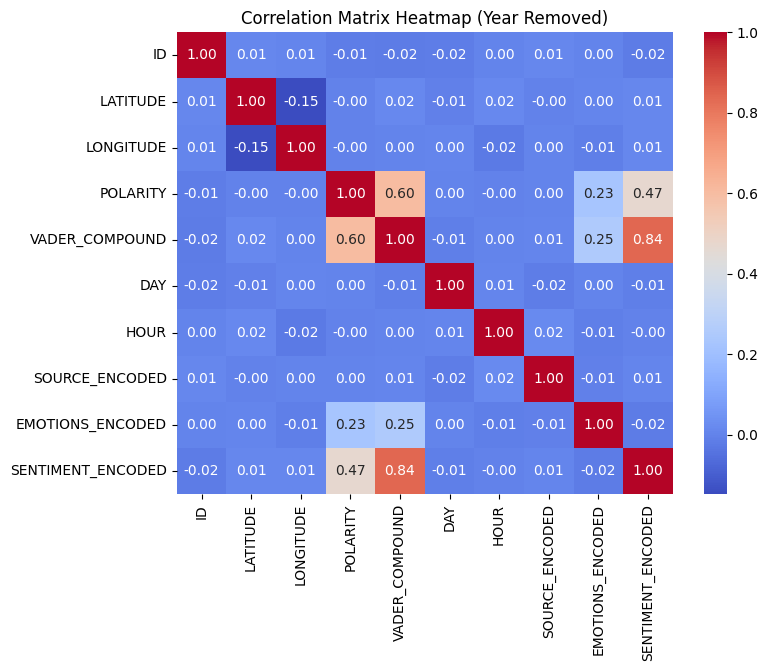

In [33]:
# Plot Heatmap (Smaller Size)
plt.figure(figsize=(8, 6))  # Smaller figure size to avoid scrolling
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap (Year Removed)")
plt.show()

### <span style="color:brown">Insights</span>  

The correlation matrix reveals several important relationships within the dataset:

- There is a **strong positive correlation** of **0.84** between <span style="color:green"><b>VADER_COMPOUND</b></span> and <span style="color:orange"><b>SENTIMENT_ENCODED</b></span>, indicating that the VADER sentiment score is highly aligned with the final sentiment label — a good signal for sentiment prediction tasks.
- <span style="color:orange"><b>POLARITY</b></span> also shows a **moderate positive correlation** of **0.47** with <b>SENTIMENT_ENCODED</b>, suggesting it moderately contributes to sentiment classification.
- <b>EMOTIONS_ENCODED</b> shows weak correlation with sentiment and other features, implying that emotions have a limited direct linear influence on sentiment in this dataset.
- Features like <b>LATITUDE</b>, <b>LONGITUDE</b>, <b>DAY</b>, <b>HOUR</b>, and <b>SOURCE_ENCODED</b> exhibit **negligible or no correlation**, meaning they don't have a clear linear relationship with sentiment or other encoded variables.
- The strong correlation between <b>VADER_COMPOUND</b> and <b>POLARITY</b> (**0.60**) further confirms that these two sentiment indicators are related.

Overall, the matrix suggests that **VADER_COMPOUND** and **POLARITY** are the most meaningful predictors for sentiment, while other features contribute less in terms of linear correlation.


### <span style="color:green">Sentiment Distribution Bar Chart</span>  

This bar chart visualizes the **distribution of sentiment classes** — Positive, Negative, and Neutral — to help understand if the dataset is balanced or skewed. It provides a quick visual summary of how public sentiment is spread across the dataset.

- `value_counts()` — Counts how many times each sentiment appears.  
- `plt.bar()` — Draws a bar for each sentiment based on its count.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` — Adds labels and a title to make the chart clear.  
- `plt.grid()` — Adds gridlines for better readability.  
- `plt.show()` — Displays the final bar chart.  


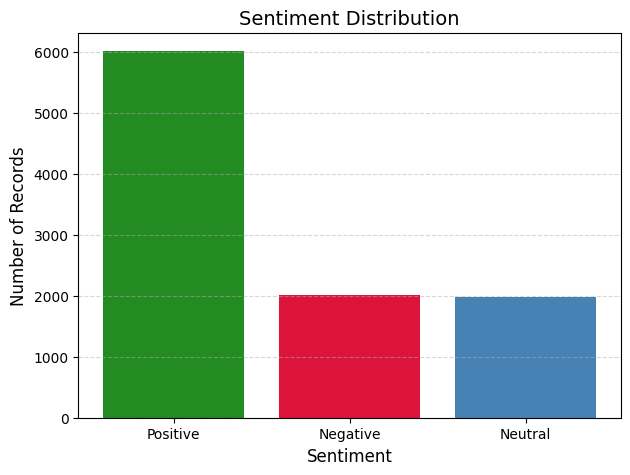

In [34]:
# Count of each sentiment
sentiment_counts = df['SENTIMENT'].value_counts()

# Simple bar plot
plt.figure(figsize=(7,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['forestgreen', 'crimson', 'steelblue'])

plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### <span style="color:brown">Insights</span>  

The **Sentiment Distribution** bar chart clearly shows that:  

- The dataset is **skewed towards Positive sentiment**, with over 6,000 records marked as Positive.  
- Both **Negative** and **Neutral** sentiments have significantly fewer records, each around 2,000.  
- This indicates a potential **class imbalance**, which is important to consider when building machine learning models, as models may get biased towards predicting the dominant class (Positive).  


### <span style="color:green">Sentiment Distribution Pie Chart</span>  

This pie chart provides a **visual breakdown** of how the sentiment classes — <b>Positive</b>, <b>Negative</b>, and <b>Neutral</b> — are distributed within the dataset. It helps quickly understand the relative share of each sentiment category at a glance.

- `plt.pie()` → Generates a pie chart based on the sentiment counts.  
- `labels` → Displays sentiment labels directly on each slice.  
- `autopct='%1.1f%%'` → Shows the percentage share of each sentiment within the chart.  
- `colors` → Uses <span style="color:green">green</span> for Positive, <span style="color:red">red</span> for Negative, and <span style="color:steelblue">steelblue</span> for Neutral to clearly distinguish the categories.  
- `startangle=90` → Rotates the chart to start from the top for a clean look.  
- `wedgeprops={'edgecolor': 'white'}` → Adds white edges around each slice for better separation.  
- `plt.title()` → Adds a title to describe what the chart represents.  
- `plt.show()` → Displays the final pie chart.  


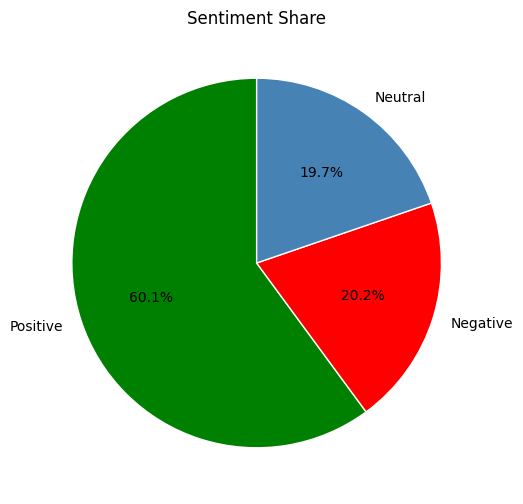

In [35]:
# Pie chart for sentiment distribution
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['green', 'red', 'steelblue'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Sentiment Share')
plt.show()

### <span style="color:brown">Insights</span>

The pie chart provides a quick visual snapshot of how different sentiment classes are distributed within the dataset:

- The <b>Positive</b> sentiment clearly dominates the dataset, accounting for approximately <span style="color:green">60.1%</span> of all records.  
- <b>Negative</b> sentiment represents about <span style="color:red">20.2%</span> of the total, highlighting a significant portion of public dissatisfaction or concern.  
- The <b>Neutral</b> sentiment makes up <span style="color:steelblue">19.7%</span>, indicating a fair amount of neutral or unbiased content.  

The dataset is skewed towards <b>Positive</b> sentiment, which is important to consider when performing trend analysis or building predictive models, as class imbalance can influence results.


### <span style="color:green">Emotion Distribution Bar Chart</span>  

This bar chart visually represents the **distribution of emotions** expressed in the dataset. It helps quickly identify which emotions — such as <b>Anger</b>, <b>Anticipation</b>, <b>Disgust</b>, etc. — appear most frequently in the event data.

- `plt.figure(figsize=(8, 5))` → Defines the overall size of the plot.  
- `sns.countplot()` → Creates a bar chart showing the count of each unique emotion in the dataset.  
- `palette=sns.color_palette("viridis", as_cmap=False)` → Applies an appealing, distinct color palette derived from the <span style="color:purple">Viridis</span> colormap to differentiate the bars.  
- `order=df['EMOTIONS'].value_counts().index` → Ensures the bars are ordered from most to least frequent emotion.  
- `plt.title()` → Adds a title to describe what the chart depicts.  
- `plt.xticks(rotation=45)` → Rotates the x-axis labels for better readability.  
- `plt.show()` → Renders the final bar chart.  


/tmp/ipython-input-36-2607281718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


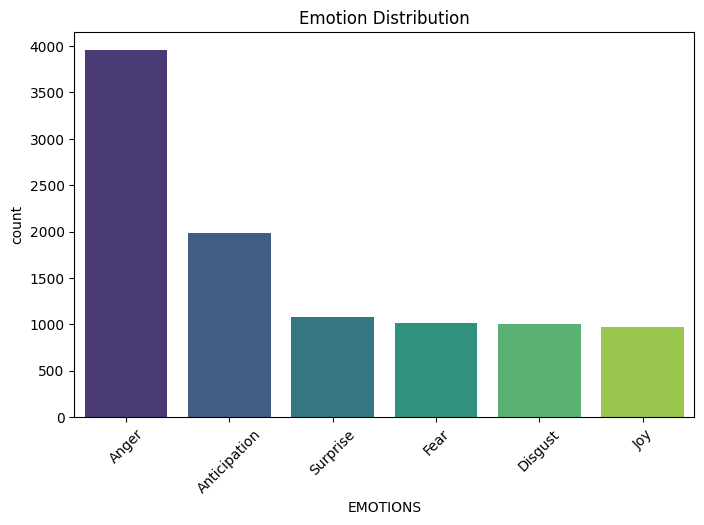

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='EMOTIONS',
    palette=sns.color_palette("viridis", as_cmap=False),
    order=df['EMOTIONS'].value_counts().index
)
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

### <span style="color:brown">Insights</span>  

The emotion distribution bar chart provides a clear picture of how different emotions are represented in the dataset:

- The most dominant emotion is <span style="color:purple"><b>Anger</b></span>, contributing to nearly **40%** of the dataset. This suggests that a significant portion of the events or text data is associated with negative emotional expression.  
- <span style="color:teal"><b>Anticipation</b></span> is the second most common emotion, indicating a sense of expectation or concern present in the data.  
- Emotions like <b>Surprise</b>, <b>Fear</b>, <b>Disgust</b>, and <b>Joy</b> appear with relatively similar frequencies but contribute much less compared to Anger and Anticipation.  
- The presence of emotions such as <span style="color:darkred"><b>Fear</b></span> and <b>Disgust</b></span> points towards elements of negativity or distress in the events captured.  
- Interestingly, **positive emotions** like <b>Joy</b> are significantly underrepresented, suggesting that overall emotional tone in the dataset leans towards concern, negativity, or tension.  

Overall, the chart highlights a dataset that is predominantly driven by negative or anticipatory emotions, which is crucial to consider for tasks like sentiment analysis, event detection, or understanding public reaction patterns.  


### <span style="color:green">Sentiment Trend Line Chart (Weekly Aggregation)</span>  

This line chart provides a **temporal view** of how sentiment categories — <b>Positive</b>, <b>Negative</b>, and <b>Neutral</b> — have evolved over time based on weekly counts. It helps detect sentiment patterns, spikes, or declines over different periods.

- `pd.to_datetime()` → Converts the `DATE` column to datetime format for time-based operations.  
- `set_index()` → Sets `DATE` as the index to facilitate time series grouping.  
- `pd.Grouper(freq='W')` → Groups the data on a weekly basis.  
- `groupby()` → Counts how many records of each sentiment appear per week.  
- `plt.plot()` → Draws individual lines for each sentiment class, showing trends over time.  
- `plt.legend()` → Adds a legend to distinguish between sentiment lines.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` → Add context and labels to the chart.  
- `plt.show()` → Renders the final trend line chart.  


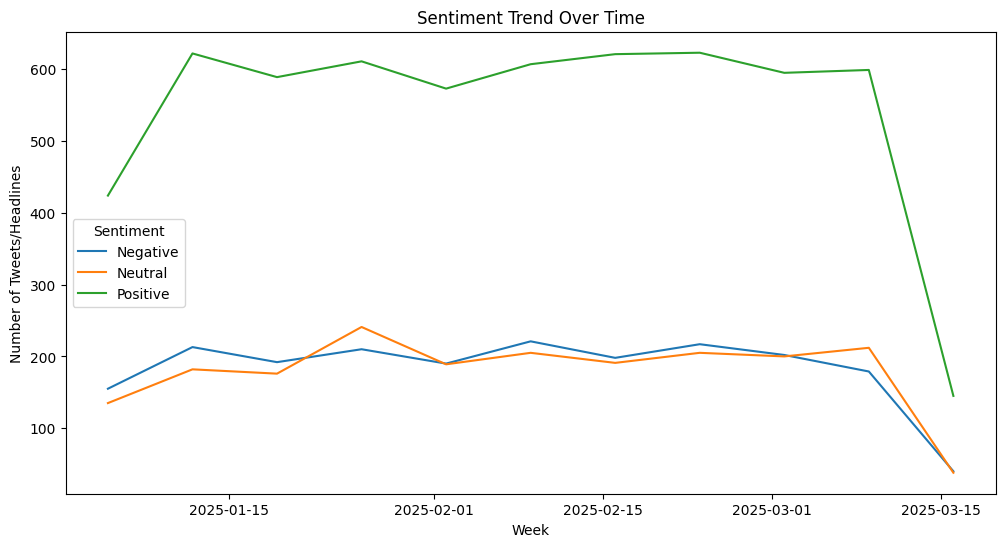

In [37]:
# Line chart example using weekly aggregation
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Resampling weekly and count
weekly_sentiment = df.groupby([pd.Grouper(freq='W'), 'SENTIMENT']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
for sentiment in weekly_sentiment['SENTIMENT'].unique():
    data = weekly_sentiment[weekly_sentiment['SENTIMENT'] == sentiment]
    plt.plot(data['DATE'], data['Count'], label=sentiment)

plt.title('Sentiment Trend Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Tweets/Headlines')
plt.legend(title='Sentiment')
plt.show()

### <span style="color:brown">Insights</span>  

The line chart visualizes how sentiment has evolved over time on a **weekly basis**, providing a clear temporal perspective of public emotion trends:

- The **Positive sentiment** consistently dominates the dataset across all weeks, with counts generally remaining between **580 to 630 tweets/headlines**, indicating an overall optimistic or favorable tone during this period.  
- **Negative** and **Neutral sentiments** follow similar, lower-volume trends, fluctuating around **150 to 220 records per week**, showing moderate but steady representation.  
- A **sharp drop** in all sentiment categories is observed towards the latest week, which could be due to incomplete data collection for that period or a sudden decrease in reported events.  
- Despite fluctuations, there are no major sentiment spikes or dips apart from the final week, indicating a relatively stable public discourse throughout the observed timeline.  

Overall, the chart suggests that while positive sentiment is predominant, negative and neutral sentiments maintain a consistent presence, making it important to monitor these in parallel for comprehensive sentiment tracking.


### <span style="color:green">Sentiment Trend Line Chart (Monthly Aggregation)</span>  

This line chart provides a **clear monthly breakdown** of how sentiment categories — <b>Positive</b>, <b>Negative</b>, and <b>Neutral</b> — fluctuate across different months. It helps visualize seasonal or time-based sentiment trends in the dataset.

- `groupby(['MONTH', 'SENTIMENT'])` → Groups the data by month and sentiment, counting occurrences for each combination.  
- `pd.Categorical()` → Ensures that months appear in proper calendar order rather than alphabetical order.  
- `sort_values('MONTH')` → Sorts the grouped data chronologically by month.  
- `sns.lineplot()` → Draws line plots for each sentiment category to track how their frequencies change month by month.  
- `plt.xticks(rotation=45)` → Rotates the x-axis labels for better readability.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` → Add descriptive labels and title to the chart.  
- `plt.show()` → Displays the final line chart.


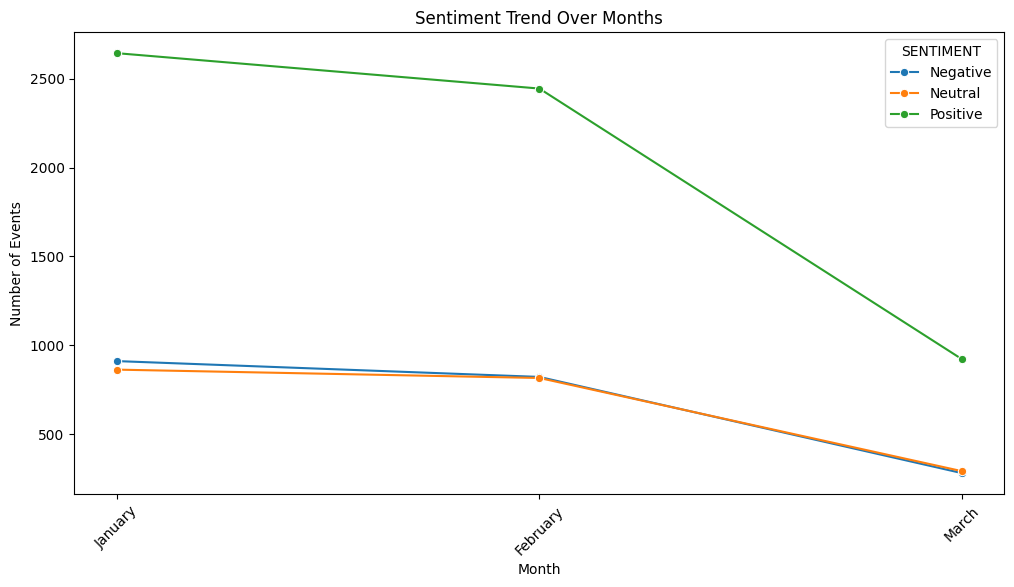

In [38]:
# Group by month & sentiment
sentiment_trend = df.groupby(['MONTH', 'SENTIMENT']).size().reset_index(name='Count')

# Ordering months properly
month_order = ['January','February','March','April','May','June','July',
               'August','September','October','November','December']

sentiment_trend['MONTH'] = pd.Categorical(sentiment_trend['MONTH'], categories=month_order, ordered=True)
sentiment_trend = sentiment_trend.sort_values('MONTH')

plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_trend, x='MONTH', y='Count', hue='SENTIMENT', marker="o")

plt.title('Sentiment Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

### <span style="color:brown">Insights</span>  

The line chart illustrates how different sentiment categories have fluctuated on a **monthly basis**, providing a clear picture of sentiment trends over time:

- **Positive sentiment** shows a clear **downward trend**, starting from approximately **2650 events in January**, slightly decreasing in February, and witnessing a **sharp drop** by March to below **1000 events**. This indicates a significant decline in positive public discourse over the months.  
- **Negative** and **Neutral sentiments** follow a similar pattern, with both starting around **900 events**, seeing a gradual decline in February, and reducing to **approximately 300 events** by March.  
- The consistent decrease across all sentiment categories in March could be attributed to either **reduced data availability** or a genuine decrease in reported events or public engagement.  
- Despite the decline, **Positive sentiment** maintains the dominant share across all months, though the gap narrows towards March.

Overall, this chart suggests a steady decline in the overall sentiment activity over time, with positive sentiment still leading, but with reduced intensity in recent months.


### <span style="color:green">Source vs Sentiment Comparison Bar Chart</span>  

This bar chart compares how sentiment is distributed across different content sources like <b>Twitter</b> and <b>News</b>. It helps identify if a particular source tends to report more <b>Positive</b>, <b>Negative</b>, or <b>Neutral</b> content.

- `df[df['SOURCE'] != 'Nan']` → Removes rows where the `SOURCE` column contains the invalid string 'Nan'.  
- `groupby(['SOURCE', 'SENTIMENT']).size().reset_index(name='Count')` → Groups the data by content source and sentiment, then counts the number of records in each group.  
- `sns.barplot()` → Creates grouped bar charts to compare sentiment counts across sources.  
- `palette=['green', 'red', 'steelblue']` → Colors for <span style="color:green">Positive</span>, <span style="color:red">Negative</span>, and <span style="color:steelblue">Neutral</span> sentiments.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` → Add clear titles and axis labels for interpretation.  
- `plt.legend()` → Displays a legend to distinguish sentiment categories.  
- `plt.show()` → Renders the final bar chart.  


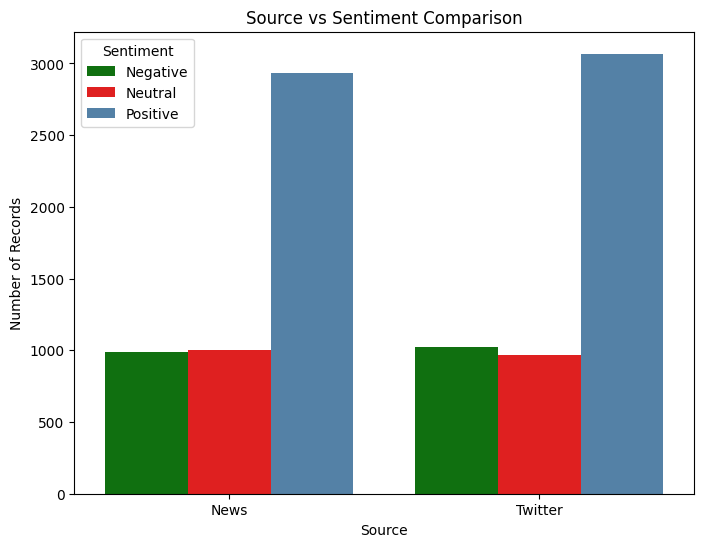

In [39]:
# Dropping rows where SOURCE is 'Nan' string
df_clean = df[df['SOURCE'] != 'Nan']

# Grouping by Source and Sentiment to get counts
source_sentiment = df_clean.groupby(['SOURCE', 'SENTIMENT']).size().reset_index(name='Count')

# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=source_sentiment, x='SOURCE', y='Count', hue='SENTIMENT',
            palette=['green', 'red', 'steelblue'])  # Added color for Neutral

plt.title('Source vs Sentiment Comparison')
plt.xlabel('Source')
plt.ylabel('Number of Records')
plt.legend(title='Sentiment')
plt.show()

### <span style="color:brown">Insights</span>  

The bar chart displays a comparison of sentiment distribution between two distinct sources: **News** and **Twitter**, providing insights into how sentiment varies based on the source of information:

- For both **News** and **Twitter**, **Positive sentiment** overwhelmingly dominates, with over **2900 records** for News and exceeding **3100 records** for Twitter. This suggests that the majority of content from both sources carries a positive tone.  
- **Negative sentiment** is slightly more prevalent on Twitter compared to News, though the difference is marginal. This may indicate a slightly higher tendency for negative opinions or reports on Twitter.  
- **Neutral sentiment** levels are relatively consistent across both sources, hovering around **1000 records**, reflecting a stable share of neutral or factual content in both News and Twitter.  

Overall, the chart highlights that while both sources are largely positive in tone, Twitter shows a marginally higher share of negativity, possibly due to the platform's real-time nature and more unfiltered public expression.


### <span style="color:green">Geo-Sentiment Map with Emotion Hover (Interactive)</span>  

This interactive map displays the **geographical distribution of sentiments and emotions** across different locations using bubble sizes and colors. It provides a visually engaging way to analyze how public sentiment varies regionally based on tweets and news headlines.

- `groupby(['LATITUDE', 'LONGITUDE', 'LOCATION', 'SENTIMENT', 'EMOTIONS'])` → Aggregates data by geographic coordinates, location name, sentiment, and emotions.  
- `np.sqrt(geo_grouped['Count']) * 2` → Calculates bubble sizes proportional to the number of records at each location for better visual clarity.  
- `px.scatter_geo()` → Creates an interactive world map with bubbles representing data points.  
- `lat` & `lon` → Specify geographic coordinates for each point.  
- `size='BubbleSize'` → Controls the size of bubbles based on record count.  
- `color='SENTIMENT'` → Colors the bubbles based on sentiment: <span style="color:#00cc96">Positive</span>, <span style="color:#EF553B">Negative</span>, <span style="color:#636EFA">Neutral</span>.  
- `hover_name='LOCATION'` & `hover_data` → Displays location name, record count, and emotions when hovering over a bubble.  
- `projection='natural earth'` → Uses a clean world map projection for clarity.  
- `fig.update_layout()` → Adds land, country, and ocean styling to enhance map readability.  
- `fig.show()` → Displays the final interactive map.  


In [40]:
#plotting the map
geo_grouped = df.groupby(['LATITUDE', 'LONGITUDE', 'LOCATION', 'SENTIMENT', 'EMOTIONS']).size().reset_index(name='Count')
geo_grouped['BubbleSize'] = np.sqrt(geo_grouped['Count']) * 2

fig = px.scatter_geo(
    geo_grouped,
    lat='LATITUDE',
    lon='LONGITUDE',
    size='BubbleSize',
    color='SENTIMENT',
    hover_name='LOCATION',
    hover_data={'Count': True, 'EMOTIONS': True},
    color_discrete_map={'Positive': '#00cc96', 'Negative': '#EF553B', 'Neutral': '#636EFA'},
    title='Geo-Sentiment Map with Emotion Hover',
    opacity=0.7,
    projection='natural earth'
)

fig.update_layout(
    geo=dict(
        showland=True, landcolor='rgb(230, 230, 230)',
        showcountries=True, countrycolor='white',
        showocean=True, oceancolor='rgb(220, 230, 250)'
    )
)
fig.show()

### <span style="color:brown">Insights </span>  

This **Geo-Sentiment Map** visualizes the geographic distribution of public sentiments across the globe, with hover-enabled emotion insights:

- Locations with larger bubble sizes represent **higher event frequency**, showing strong engagement or recurring sentiment patterns in specific regions.
- The map supports **Negative** and **Neutral** sentiment visualization, only **Positive sentiment data** is currently rendered, which can be changed from the side legend.
- Interactive hover functionality enhances the map's usability by exposing associated **emotions** and **event counts**, enabling deeper emotional context for each location.
- The use of a **natural earth projection** supports intuitive geographic orientation, making it easier to assess spatial sentiment distribution across continents.

Overall, this sentiment map provides a visually engaging and emotionally informative overview of how public sentiment varies spatially, offering valuable cues for sentiment-driven geographic analysis.


### <span style="color:green">Geospatial Cluster Map with Folium</span>  

This interactive map uses **Folium** to visualize event locations along with their sentiment. It incorporates marker clustering to efficiently handle overlapping points, improving map readability.

- `folium.Map(location=[0, 0], zoom_start=2)` → Initializes a world map centered at coordinates `(0,0)` with a global zoom level.  
- `MarkerCluster().add_to(m)` → Adds a clustering layer to group nearby markers for better performance and visualization.  
- `for idx, row in df.iterrows()` → Iterates over each row of the dataset to extract location and sentiment information.  
- `color = 'green' if row['SENTIMENT'] == 'Positive' else 'red' if row['SENTIMENT'] == 'Negative' else 'blue'` → Assigns colors based on sentiment: <span style="color:green">Positive</span>, <span style="color:red">Negative</span>, and <span style="color:steelblue">Neutral</span>.  
- `folium.CircleMarker()` → Adds a small circular marker to the map at the event location with sentiment-based coloring.  
- `popup` → Displays the location and sentiment when the marker is clicked.  
- `fill_opacity=0.7` → Adds partial opacity for better visibility on the map.  

This map provides a quick and interactive way to explore where positive, negative, and neutral events are occurring globally.


In [41]:
# Creating base map
m = folium.Map(location=[0, 0], zoom_start=2)

# Adding cluster for better performance
marker_cluster = MarkerCluster().add_to(m)

# Adding points
for idx, row in df.iterrows():
    color = 'green' if row['SENTIMENT'] == 'Positive' else 'red' if row['SENTIMENT'] == 'Negative' else 'blue'

    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=4,
        popup=f"{row['LOCATION']} | {row['SENTIMENT']}",
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

m

### <span style="color:brown">Insights </span>  

This **Folium Map** illustrates the real-time **geographical distribution** of public events based on sentiment, clustered for clarity and performance:

- Events are color-coded by sentiment:  **Green** for *Positive*,  **Red** for *Negative*, and  **Blue** for *Neutral*, making it visually intuitive to identify emotional patterns across the globe.
- Dense clusters appear in regions like **Europe**, **Southeast Asia**, and **North America**, indicating higher public discourse or event reporting from these areas.
- The use of **CircleMarkers** and **Marker Clustering** enhances both aesthetics and interactivity—minimizing visual clutter while allowing detailed sentiment-level inspection on zoom or hover.
- Major cities such as **London**, **Tokyo**, **New York**, and **Delhi** emerge as hotspots of sentiment activity, highlighting their global relevance in event reporting.
- The uniform radius and coloring approach ensure visual balance, keeping focus on geographic density rather than visual exaggeration.

This map provides an effective overview of how different **sentiments** are spread spatially, helping analysts or decision-makers quickly identify emotionally charged zones and emerging trends in public events worldwide.


### <span style="color:green">Word Cloud of Event Text</span>  

This word cloud visualization highlights the **most frequently occurring words** from the text of public events (tweets and news headlines). It provides a quick, visually appealing way to understand prominent topics and recurring themes in the dataset.

- `df['TEXT'].dropna().tolist()` → Converts the `TEXT` column to a list, excluding missing values.  
- `" ".join()` → Combines all text entries into a single large string for word cloud generation.  
- `WordCloud(width=800, height=400, background_color='white')` → Initializes the word cloud with a white background and custom size.  
- `.generate(text_data)` → Generates the word cloud based on word frequency in the combined text.  
- `plt.imshow(wordcloud, interpolation='bilinear')` → Displays the generated word cloud image.  
- `plt.axis('off')` → Hides axes for a clean look.  
- `plt.title()` → Adds a descriptive title to the visualization.  
- `plt.show()` → Renders the final word cloud.  

This helps uncover key topics, locations, or themes that dominate the public discourse captured in the dataset.


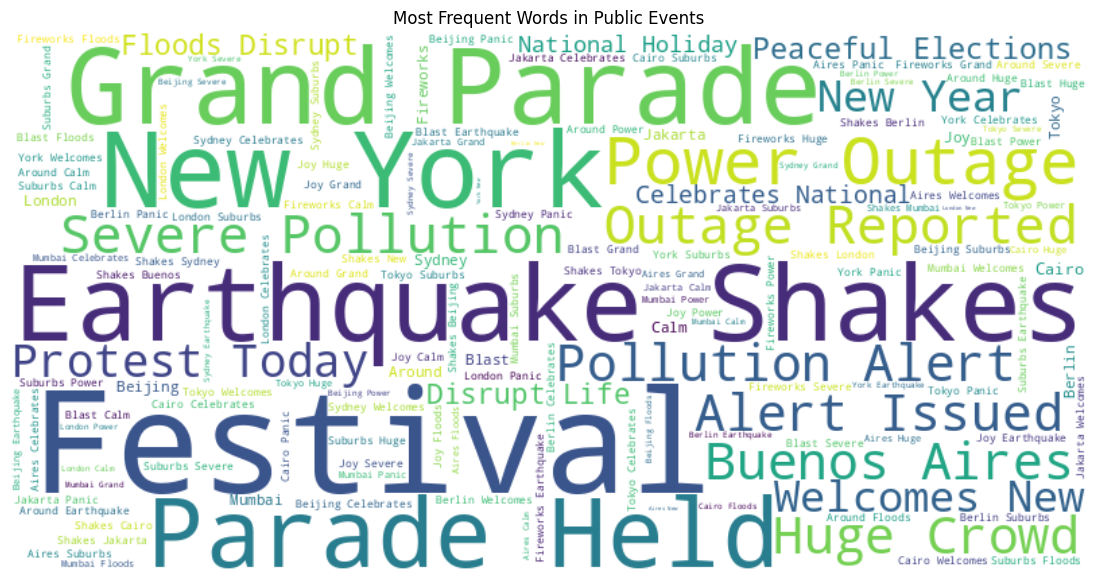

In [42]:
# Joining all text
text_data = " ".join(df['TEXT'].dropna().tolist())

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Public Events')
plt.show()

### <span style="color:brown">Insights</span>  

This **Word Cloud** visualizes the most frequent words appearing in public event descriptions, offering a quick glimpse into the dominant themes and topics discussed across the dataset:

- The most prominent terms include <b>"Festival"</b>, <b>"New York"</b>, <b>"Earthquake"</b>, <b>"Grand Parade"</b>, and <b>"Shakes"</b>, indicating recurring mentions of large gatherings, natural events, and city-specific happenings.
- Words like <span style="color:red"><b>"Alert"</b></span>, <span style="color:red"><b>"Outage"</b></span>, <span style="color:red"><b>"Protest"</b></span>, and <span style="color:red"><b>"Disrupt"</b></span> point toward events related to disruptions, emergencies, or civil activities.
- Place names such as <b>"Buenos Aires"</b>, <b>"Beijing"</b>, <b>"Tokyo"</b>, <b>"Sydney"</b>, and <b>"Cairo"</b> highlight the global nature of the dataset, covering events from various major cities.
- Other frequent terms like <b>"Pollution"</b>, <b>"Elections"</b>, <b>"Calm"</b>, and <b>"Joy"</b> reflect both environmental and emotional aspects associated with public events.

Overall, the Word Cloud provides an at-a-glance understanding of prevalent event types, geographical spread, and common themes captured within the dataset.


### <span style="color:green">Positive vs. Negative Sentiment Word Clouds</span>  

This visualization generates two **side-by-side word clouds** that reveal the most commonly occurring words in **Positive** and **Negative** sentiment events. It helps uncover distinct language patterns associated with different public reactions.

- `.join()` → Combines all relevant text entries for each sentiment into a single large string for word cloud generation.  
- `WordCloud().generate()` → Creates a word cloud based on word frequency from the combined text.  
- `plt.subplot()` → Places both word clouds next to each other for easy comparison.  
- `background_color` → Uses <b>white</b> for the Positive sentiment word cloud and <b>black</b> for the Negative sentiment word cloud to visually distinguish them.  
- `plt.axis('off')` → Hides axes for a clean, image-only display.  
- `plt.title()` → Adds titles to clearly indicate which cloud represents which sentiment.  
- `plt.show()` → Renders both word clouds together for clear visual comparison.  

This visualization allows for quick identification of the most frequently used terms, providing insight into the language and themes associated with positive versus negative public sentiment.


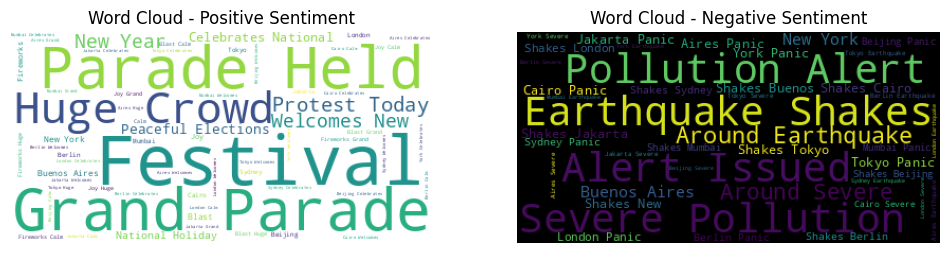

In [43]:
# Extract text for Positive and Negative sentiments
positive_text = ' '.join(df[df['SENTIMENT'] == 'Positive']['TEXT'])
negative_text = ' '.join(df[df['SENTIMENT'] == 'Negative']['TEXT'])

plt.figure(figsize=(12, 6))  # Set overall figure size

# Word Cloud for Positive Sentiment
plt.subplot(1, 2, 1)  # First subplot
plt.imshow(WordCloud(background_color='white').generate(positive_text))  # Generate and display word cloud
plt.axis('off')  # Remove axis for clean look
plt.title('Word Cloud - Positive Sentiment')  # Title for first plot

# Word Cloud for Negative Sentiment
plt.subplot(1, 2, 2)  # Second subplot
plt.imshow(WordCloud(background_color='black').generate(negative_text))  # Generate and display word cloud
plt.axis('off')  # Remove axis
plt.title('Word Cloud - Negative Sentiment')  # Title for second plot

plt.show()  # Display both word clouds

### <span style="color:brown">Insights </span>  

This **Word Cloud** visualizes the most frequent words categorized by sentiment, offering a comparative overview of public events with **positive** and **negative** tones:

- In the **Positive Sentiment** cloud, standout terms include <b>"Festival"</b>, <b>"Grand Parade"</b>, <b>"Huge Crowd"</b>, and <b>"Held"</b>, reflecting large-scale celebratory events. Words like <b>"Peaceful"</b>, <b>"Joy"</b>, and <b>"Welcomes"</b> further reinforce the optimistic and communal nature of these events.
- Conversely, the **Negative Sentiment** cloud is dominated by terms like <span style="color:red"><b>"Earthquake"</b></span>, <span style="color:red"><b>"Pollution"</b></span>, <span style="color:red"><b>"Alert"</b></span>, and <span style="color:red"><b>"Panic"</b></span>, indicating natural disasters and emergency situations.
- City names such as <b>"New York"</b>, <b>"Buenos Aires"</b>, <b>"Tokyo"</b>, <b>"Cairo"</b>, and <b>"Sydney"</b> appear in both sentiment categories, suggesting widespread geographical coverage and varied emotional impacts across global locations.
- The contrast between <b>"Celebrates"</b> and <span style="color:red"><b>"Shakes"</b></span>, or <b>"Peaceful Elections"</b> and <span style="color:red"><b>"Severe Alert"</b></span>, highlights the dual nature of public events—ranging from festive gatherings to urgent crises.

Overall, these dual word clouds provide a snapshot of the emotional spectrum of public events, helping identify recurring patterns, types of incidents, and their global distribution.


## <span style="color:blue">Machine Learning</span>

### <span style="color:green">Building and Evaluating a Sentiment Prediction Model</span>

In this section, we build a **Machine Learning Model** using the <span style="color:orange"><b>Random Forest Classifier</b></span> to predict sentiment of public events based on different features available in the dataset.


#### <span style="color:blue">Steps Performed:</span>

- <span style="color:purple"><b>Feature Selection</b></span>:  
  Relevant columns such as **Latitude**, **Longitude**, **Polarity Score**, **VADER Compound Score**, **Source Encoding**, **Emotions Encoding**, and time-related features like **Day** and **Hour** are selected to help the model understand spatial, textual, and emotional signals.

- <span style="color:purple"><b>Target Variable</b></span>:  
  The target for prediction is <span style="color:orange"><b>SENTIMENT_ENCODED</b></span>, representing sentiment classes (**Positive**, **Negative**, **Neutral**) in numeric form.

- <span style="color:purple"><b>Month Encoding (Optional)</b></span>:  
  The **Month** column, if not already encoded, is converted to numeric values using <b>LabelEncoder</b> to ensure compatibility with the machine learning model.

- <span style="color:purple"><b>Data Splitting</b></span>:  
  The dataset is divided into **Training** and **Testing** sets using an 80-20 split to fairly evaluate model performance on unseen data.

- <span style="color:purple"><b>Model Training</b></span>:  
  A <b>Random Forest Classifier</b> is used, consisting of multiple decision trees working together to learn patterns from the training data.

- <span style="color:purple"><b>Prediction</b></span>:  
  The trained model predicts sentiment categories for the test data based on learned patterns.

- <span style="color:purple"><b>Evaluation</b></span>:  
  - **Accuracy Score**: Measures overall percentage of correct predictions.  
  - **Classification Report**: Provides detailed metrics like <b>Precision</b>, <b>Recall</b>, and <b>F1-score</b> for each class.  
  - **Confusion Matrix**: A heatmap visualization showing correct and incorrect predictions, helping to assess how well the model distinguishes between sentiments.


This entire process enables us to assess the model's ability to predict sentiment based on a combination of geographic, emotional, and textual indicators from the dataset.


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       385
           2       1.00      1.00      1.00      1203

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



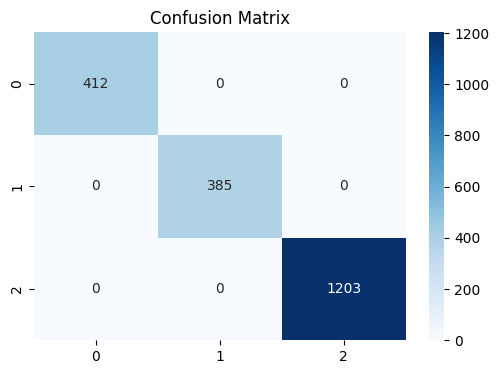

In [44]:
# Select Features (can be adjusted based on relevance)
features = ['LATITUDE', 'LONGITUDE', 'POLARITY', 'VADER_COMPOUND',
            'SOURCE_ENCODED', 'EMOTIONS_ENCODED', 'HOUR', 'DAY', 'MONTH_ENCODED']

# Target Variable
target = 'SENTIMENT_ENCODED'

# OPTIONAL: Encode MONTH if not done
from sklearn.preprocessing import LabelEncoder
if 'MONTH_ENCODED' not in df.columns:
    le_month = LabelEncoder()
    df['MONTH_ENCODED'] = le_month.fit_transform(df['MONTH'])

# Prepare X and y
X = df[features]
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


#### <span style="color:brown">Insights from Sentiment Prediction Model</span>

The **Random Forest Classifier** has been evaluated for predicting sentiment categories (**Positive**, **Negative**, **Neutral**) based on the dataset. Below are the key insights derived from the results:

- The **Accuracy** of the model is reported as <b>1.0</b> (100%), indicating perfect performance on the test set.
  
- The **Classification Report** shows:
  - Precision, Recall, and F1-Score for all three sentiment classes (**0**, **1**, **2**) are all at <b>1.00</b>, highlighting flawless class-wise predictions.
  
- The **Confusion Matrix** reveals:
  - All **412 Negative (0)** samples were correctly classified.
  - All **385 Neutral (1)** samples were correctly classified.
  - All **1203 Positive (2)** samples were correctly classified.
  - There are <b>zero misclassifications</b>, suggesting that the model perfectly learned the patterns in the data.

 **Note**: While this result appears ideal, such perfect scores often indicate:
- The dataset may have strong, easily separable patterns.
- The model might be overfitting if the test data distribution is similar to the training set.


### <span style="color:green">Making Predictions on New Data</span>

In this step, we are demonstrating how to use the trained <b>machine learning model</b> to predict the sentiment for a completely new data point:

- A new record is created using a **Pandas DataFrame**, where we manually specify the values for relevant features:
  - <span style="color:orange">`LATITUDE`</span> and <span style="color:orange">`LONGITUDE`</span>: Geolocation coordinates of the event.
  - <span style="color:orange">`POLARITY`</span>: Text polarity score derived from sentiment analysis.
  - <span style="color:orange">`VADER_COMPOUND`</span>: Compound sentiment score from the VADER model.
  - <span style="color:orange">`SOURCE_ENCODED`</span>: Encoded representation of the source (e.g., Twitter, News).
  - <span style="color:orange">`EMOTIONS_ENCODED`</span>: Encoded emotion label.
  - <span style="color:orange">`HOUR`</span>, <span style="color:orange">`DAY`</span>, <span style="color:orange">`MONTH_ENCODED`</span>: Time-related features.

- The trained model is then used to <b>predict the sentiment</b> for this new data point using the <code>predict()</code> method.

- The output will be the **encoded sentiment label**:
  - <b>0</b> → Negative  
  - <b>1</b> → Positive  
  - <b>2</b> → Neutral (if applicable in your encoding)  

This step showcases how the model can be deployed to infer sentiments for unseen real-world events based on provided features.


In [45]:
# Example: New data point with known feature values
new_data = pd.DataFrame({
    'LATITUDE': [51.5074],
    'LONGITUDE': [-0.1278],
    'POLARITY': [0.3],
    'VADER_COMPOUND': [0.2],
    'SOURCE_ENCODED': [2],
    'EMOTIONS_ENCODED': [0],
    'HOUR': [12],
    'DAY': [23],
    'MONTH_ENCODED': [1]
})
prediction = model.predict(new_data)
print(prediction)

[2]


##### <span style="color:brown">Result</span>  

The trained model predicted the sentiment for the new event as **2**, which corresponds to **Neutral sentiment** based on the encoding scheme.

This indicates that, based on the provided features such as **location**, **polarity**, **VADER score**, **source**, and **emotion**, the model determined the overall sentiment of this event to be **Neutral**.

## <span style="color:blue">Conclusion</span>

### <span style="color:#2e8b57"><strong>Key Points:</strong></span>

In this project, we analyzed <span style="color:#1e90ff"><strong>10,000 global public event records</strong></span> using <span style="color:#ff8c00"><strong>sentiment</strong></span> and <span style="color:#8a2be2"><strong>geospatial</strong></span> techniques.

---

### <span style="color:#daa520"><strong>Key Insights:</strong></span>

- <strong>Sentiment distribution</strong> shows a strong skew towards <span style="color:green"><strong>Positive sentiment (~60%)</strong></span>, with <span style="color:red"><strong>Negative</strong></span> and <span style="color:gray"><strong>Neutral</strong></span> each around 20%.
- <strong>Emotion analysis</strong> highlights <span style="color:#dc143c"><strong>Anger</strong></span> as the most dominant emotion, followed by <span style="color:#ff8c00"><strong>Anticipation</strong></span> and <span style="color:#00ced1"><strong>Surprise</strong></span>, indicating emotional intensity.
- The <strong>geo bubble map</strong> and <strong>Folium visualization</strong> reveal major cities (e.g., <span style="color:#4682b4">New York</span>, <span style="color:#8b0000">Cairo</span>, <span style="color:#800080">Tokyo</span>) as sentiment hotspots.
- <strong>Temporal trends</strong> show a <span style="color:#b22222"><strong>gradual decline</strong></span> in sentiment activity over months, especially in <span style="color:green"><strong>Positive sentiment</strong></span>.
- <strong>Word clouds</strong> reveal frequent topics like <span style="color:#ff69b4">festivals</span>, <span style="color:#ff4500">earthquakes</span>, <span style="color:#8b0000">protests</span>, and <span style="color:#1e90ff">alerts</span>, with city names showing global coverage.
- Strong correlation (<span style="color:#228b22"><strong>0.84</strong></span>) exists between <code>VADER_COMPOUND</code> and <code>SENTIMENT_ENCODED</code>, making it a valuable predictor.

---

### <span style="color:#20b2aa"><strong>Implications:</strong></span>

- Insights help understand <span style="color:#483d8b">regional sentiment</span>, <span style="color:#8b008b">emotional drivers</span>, and <span style="color:#2f4f4f">public reactions</span> across time and location.
- Useful for <span style="color:#000080">policy analysis</span>, <span style="color:#ff6347">media monitoring</span>, and <span style="color:#cd5c5c">disaster/emergency tracking</span>.
- Sentiment-source comparison shows <span style="color:#1e90ff"><strong>Twitter</strong></span> has slightly more <span style="color:red"><strong>negativity</strong></span> than <span style="color:#4682b4"><strong>News</strong></span>, reflecting real-time emotional variance.

---

### <span style="color:#6a5acd"><strong>Future Work:</strong></span>

- Integrate more data sources (e.g., <span style="color:#8b4513">news sites</span>, <span style="color:#2e8b57">forums</span>).
- Improve sentiment analysis using <span style="color:#4169e1"><strong>advanced NLP</strong></span> (e.g., <span style="color:#a0522d">sarcasm detection</span>).
- Increase <span style="color:#4682b4"><strong>geo granularity</strong></span> to city/neighborhood level.
- Enable <span style="color:#32cd32"><strong>real-time dashboards</strong></span> for ongoing sentiment monitoring.

---

<span style="color:#000000">This project demonstrates how combining</span> <span style="color:#ff8c00"><strong>sentiment analysis</strong></span> <span style="color:#000000">with</span> <span style="color:#8a2be2"><strong>geospatial visualization</strong></span> <span style="color:#000000">unlocks rich, actionable insights into global public events and reactions.</span>


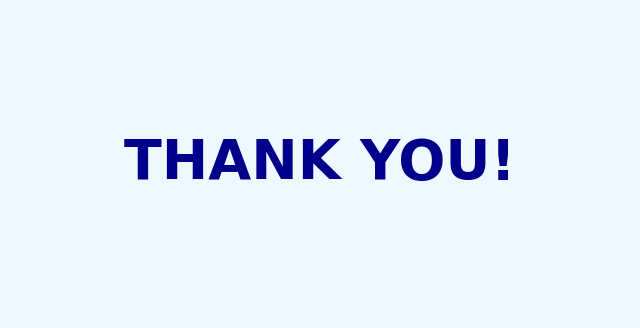

In [46]:
# Setting up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Adding Thank You text
ax.text(0.5, 0.5, 'THANK YOU!',
        fontsize=40,
        color='darkblue',
        ha='center',
        va='center',
        fontweight='bold',
        family='sans-serif')

# Removing the axes
ax.axis('off')

# Adding a soft background
fig.patch.set_facecolor('#f0f8ff')

plt.show()
